# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

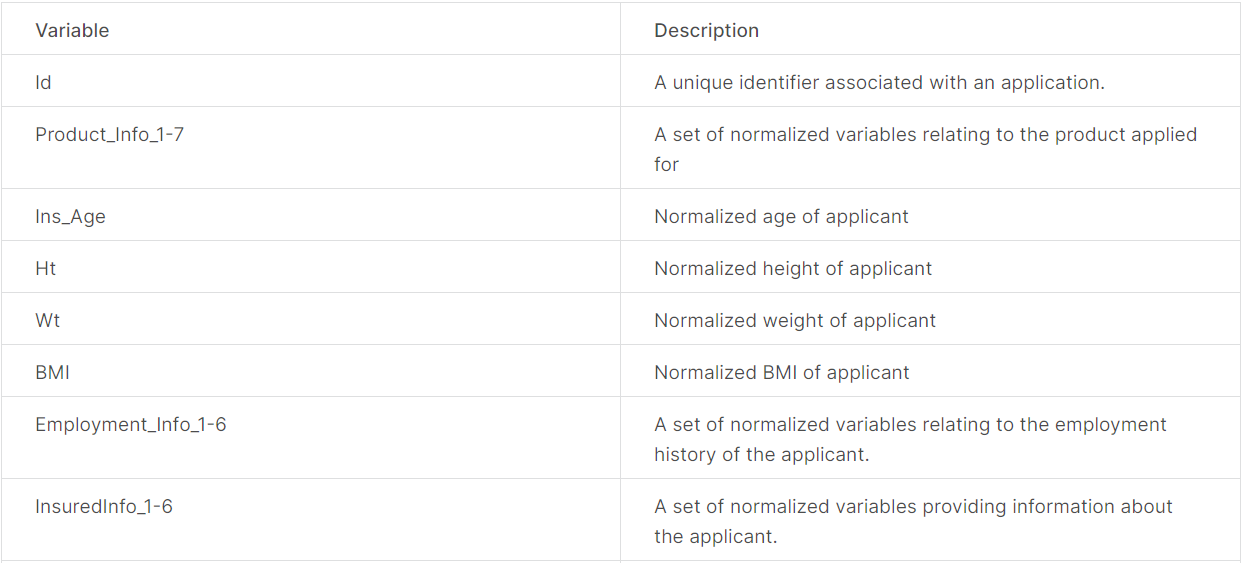

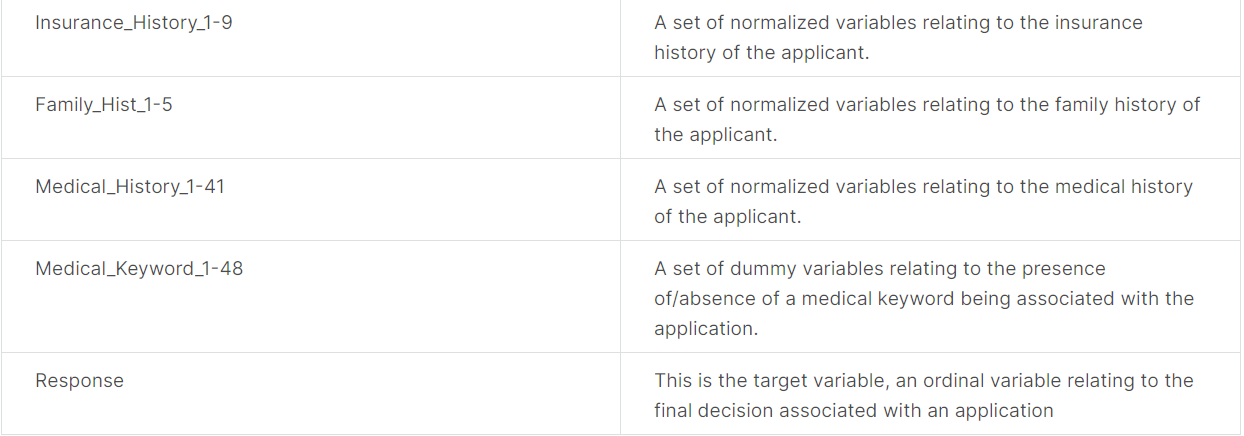

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
insurance_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 4/Week 2/Day 6/train.csv",index_col='Id')

In [4]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [5]:
insurance_df.shape

(59381, 127)

In [6]:
# Exploring the dependent variable

insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

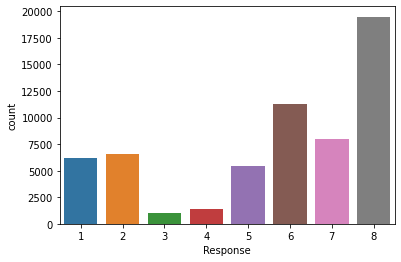

In [7]:
sns.countplot(x = insurance_df['Response'])

In [8]:
# Converting the dependent variable to a binary variable

def modified_response(row):
  if row['Response']<= 7 and row['Response'] >= 0:
    val = 0
  elif row['Response'] == 8:
    val = 1
  else:
    val = -1
  
  return val

In [9]:
insurance_df['Modified_Response'] = insurance_df.apply(modified_response,axis = 1)

In [10]:
insurance_df.drop(columns = ['Response'], axis= 1, inplace = True)

In [11]:
insurance_df['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

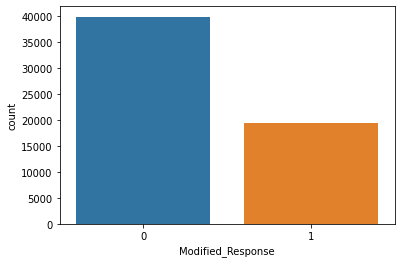

In [12]:
sns.countplot(x = insurance_df['Modified_Response'])

In [13]:
pd.set_option('max_rows',None)
insurance_df.isnull().sum()/len(insurance_df)

Product_Info_1         0.000000
Product_Info_2         0.000000
Product_Info_3         0.000000
Product_Info_4         0.000000
Product_Info_5         0.000000
Product_Info_6         0.000000
Product_Info_7         0.000000
Ins_Age                0.000000
Ht                     0.000000
Wt                     0.000000
BMI                    0.000000
Employment_Info_1      0.000320
Employment_Info_2      0.000000
Employment_Info_3      0.000000
Employment_Info_4      0.114161
Employment_Info_5      0.000000
Employment_Info_6      0.182786
InsuredInfo_1          0.000000
InsuredInfo_2          0.000000
InsuredInfo_3          0.000000
InsuredInfo_4          0.000000
InsuredInfo_5          0.000000
InsuredInfo_6          0.000000
InsuredInfo_7          0.000000
Insurance_History_1    0.000000
Insurance_History_2    0.000000
Insurance_History_3    0.000000
Insurance_History_4    0.000000
Insurance_History_5    0.427679
Insurance_History_7    0.000000
Insurance_History_8    0.000000
Insuranc

In [14]:
missing_val_count_by_col = insurance_df.isnull().sum()/len(insurance_df)
missing_val_count_by_col[missing_val_count_by_col > .4].sort_values(ascending = False)

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64

In [15]:
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

In [16]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 122 entries, Product_Info_1 to Modified_Response
dtypes: float64(13), int64(108), object(1)
memory usage: 57.7+ MB


In [17]:
insurance_df.describe(include= 'all')

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
count,59381.000000,59381,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
unique,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.026355,NaN,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,0.328203
std,0.160191,NaN,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,0.469563
min,1.000000,NaN,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [18]:
insurance_df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [19]:
insurance_df.drop(columns = ['Product_Info_2'], inplace = True)

In [20]:
# data for independent variables

X = insurance_df.drop( columns = ['Modified_Response'])

# data for dependent variables

y = insurance_df['Modified_Response']

In [21]:
# train test split
x_train , x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = 0)

In [22]:
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

## Building logistic regression, random forest, gradient boosted decision trees and xgboost models

## Build logistic regression

Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [24]:
logistic_model = LogisticRegression()
grid_param = { 'C' : [80,90,100],
              'max_iter' : [2500]
              }
logistic_grid = GridSearchCV(estimator = logistic_model, param_grid= grid_param, cv= 5, scoring='roc_auc', verbose=2)

logistic_grid.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ................................C=80, max_iter=2500; total time=  35.9s
[CV] END ................................C=80, max_iter=2500; total time=  37.9s
[CV] END ................................C=80, max_iter=2500; total time=  38.8s
[CV] END ................................C=80, max_iter=2500; total time=  35.5s
[CV] END ................................C=80, max_iter=2500; total time=  35.1s
[CV] END ................................C=90, max_iter=2500; total time=  36.7s
[CV] END ................................C=90, max_iter=2500; total time=  37.3s
[CV] END ................................C=90, max_iter=2500; total time=  35.4s
[CV] END ................................C=90, max_iter=2500; total time=  38.0s
[CV] END ................................C=90, max_iter=2500; total time=  39.9s
[CV] END ...............................C=100, max_iter=2500; total time=  40.6s
[CV] END ...............................C=100, ma

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [80, 90, 100], 'max_iter': [2500]},
             scoring='roc_auc', verbose=2)

In [25]:
logistic_optimal_model = logistic_grid.best_estimator_
print(logistic_optimal_model)

LogisticRegression(C=80, max_iter=2500)


In [26]:
# Train

con_met = confusion_matrix(y_train,logistic_optimal_model.predict(x_train))
print(con_met)
print('\n')
a = (con_met[0][0]+con_met[1][1])/(con_met[0][0]+con_met[0][1]+con_met[1][0]+con_met[1][1])
p = con_met[1][1]/(con_met[1][1]+con_met[0][1])
r = con_met[1][1]/(con_met[1][1]+con_met[1][0])
print(" Accuracy : ", a)
print(" Precision : ", p)
print(" Recall : ", r)
print(" f1_score : ", (2*p*r)/(p+r))

[[26191  3789]
 [ 4529 10026]]


 Accuracy :  0.8132255529358932
 Precision :  0.7257328990228012
 Recall :  0.688835451734799
 f1_score :  0.7068029608741627


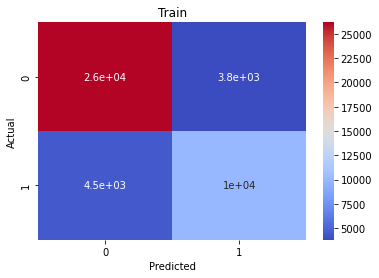

In [27]:
# Train

sns.heatmap(con_met, annot= True, cmap='coolwarm')
plt.title('Train')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
# Test


con_met = confusion_matrix(y_test,logistic_optimal_model.predict(x_test))
print(con_met)
print('\n')
a = (con_met[0][0]+con_met[1][1])/(con_met[0][0]+con_met[0][1]+con_met[1][0]+con_met[1][1])
p = con_met[1][1]/(con_met[1][1]+con_met[0][1])
r = con_met[1][1]/(con_met[1][1]+con_met[1][0])
print(" Accuracy : ", a)
print(" Precision : ", p)
print(" Recall : ", r)
print(" f1_score : ", (2*p*r)/(p+r))

[[8646 1266]
 [1530 3404]]


 Accuracy :  0.8116664421392967
 Precision :  0.7289079229122055
 Recall :  0.6899067693554926
 f1_score :  0.7088713036234902


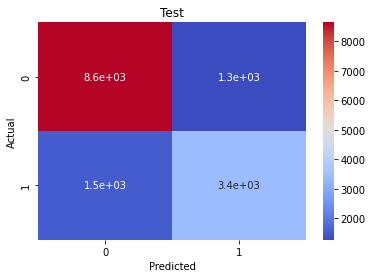

In [29]:
# Test

sns.heatmap(con_met, annot= True, cmap='coolwarm')
plt.title('Test')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
# roc_auc_score

from sklearn.metrics import roc_auc_score

print('Train -> roc_auc_score :  ',roc_auc_score(y_train,logistic_optimal_model.predict(x_train)))
print('\n')
print('Test -> roc_auc_score :  ',roc_auc_score(y_test,logistic_optimal_model.predict(x_test)))

Train -> roc_auc_score :   0.7812255977820092


Test -> roc_auc_score :   0.7810913992055913


In [31]:
# classification report

from sklearn.metrics import classification_report

print('Train  classification report :  ',classification_report(y_train,logistic_optimal_model.predict(x_train)))
print('\n')
print('Test  classification report :  ',classification_report(y_test,logistic_optimal_model.predict(x_test)))

Train  classification report :                 precision    recall  f1-score   support

           0       0.85      0.87      0.86     29980
           1       0.73      0.69      0.71     14555

    accuracy                           0.81     44535
   macro avg       0.79      0.78      0.78     44535
weighted avg       0.81      0.81      0.81     44535



Test  classification report :                 precision    recall  f1-score   support

           0       0.85      0.87      0.86      9912
           1       0.73      0.69      0.71      4934

    accuracy                           0.81     14846
   macro avg       0.79      0.78      0.78     14846
weighted avg       0.81      0.81      0.81     14846



## Random Forest Implementation

Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
# max_depth = [4,6,8]
max_depth = [8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [34]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='roc_auc')

rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.7s
[CV] END max_depth=8, min_s

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [35]:
rf_optimal_model = rf_grid.best_estimator_
rf_optimal_model

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=150)

In [36]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 100}

In [37]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(x_train)
test_class_preds = rf_optimal_model.predict(x_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(x_train)[:,1]
test_preds = rf_optimal_model.predict_proba(x_test)[:,1]

In [38]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [39]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8084652520489503
The accuracy on test dataset is 0.8044591135659437


In [40]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [41]:
train_cm

array([[27303,  2677],
       [ 5853,  8702]])

In [42]:
test_cm

array([[8982,  930],
       [1973, 2961]])

In [43]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [44]:
train_auc

0.8908910474840779

In [45]:
test_auc

0.8890725821358476

In [46]:
x_train.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=120)

In [47]:
rf_optimal_model.feature_importances_

array([2.66759669e-04, 6.22298735e-03, 3.38080319e-02, 0.00000000e+00,
       1.66963140e-04, 4.85766249e-06, 3.09756486e-02, 1.55442605e-02,
       1.87423856e-01, 2.34892298e-01, 1.89191664e-03, 1.30790602e-03,
       5.05349830e-04, 4.63061158e-04, 1.10315990e-03, 1.65784404e-03,
       5.85504855e-03, 7.68436483e-04, 4.45394928e-04, 5.59954391e-04,
       7.73828415e-04, 3.01479445e-02, 1.60010653e-03, 1.64150146e-04,
       1.20183959e-03, 2.79678225e-04, 4.12949360e-04, 2.88085060e-03,
       3.61046793e-04, 3.09223393e-04, 3.22487307e-04, 6.11355576e-03,
       1.22896485e-02, 5.23523694e-03, 1.83396184e-02, 5.31807674e-03,
       1.12906832e-03, 3.60540086e-04, 1.01079512e-01, 3.41379973e-04,
       3.82295618e-03, 6.45613344e-05, 2.66667551e-04, 1.76975348e-04,
       0.00000000e+00, 7.71438428e-05, 2.97802727e-03, 3.22423247e-06,
       4.76734335e-03, 2.52104624e-04, 1.06258216e-04, 1.56576066e-05,
       1.83713106e-04, 9.75914484e-05, 3.29953395e-06, 9.33737204e-02,
      

In [48]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [49]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [50]:
importance_df.head()

,Feature,Feature Importance
0,Product_Info_1,0.00
1,Product_Info_3,0.01
2,Product_Info_4,0.03
3,Product_Info_5,0.00
4,Product_Info_6,0.00


In [51]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
9,BMI,0.23
8,Wt,0.19
86,Medical_Keyword_15,0.11
38,Medical_History_4,0.10
55,Medical_History_23,0.09
2,Product_Info_4,0.03
21,InsuredInfo_6,0.03
6,Ins_Age,0.03
74,Medical_Keyword_3,0.02
34,Family_Hist_4,0.02


## Gradient Boosting Implementation

Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
# Number of trees
# n_estimators = [50,80,100]

n_estimators = [50,80]

# Maximum depth of trees
# max_depth = [4,6,8]
max_depth = [8]

# Minimum number of samples required to split a node
# min_samples_split = [50,100,150]
min_samples_split = [50]


# Minimum number of samples required at each leaf node
# min_samples_leaf = [40,50]
min_samples_leaf = [40]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [54]:
# Create an instance of the GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='roc_auc')

gb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  16.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  16.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  18.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  25.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  25.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  25.7s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [8], 'min_samples_leaf': [40],
                         'min_samples_split': [50], 'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=2)

In [55]:
gb_optimal_model = gb_grid.best_estimator_
print(gb_optimal_model)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=40,
                           min_samples_split=50, n_estimators=80)


In [56]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [57]:
# Making predictions on train and test data

train_class_preds = gb_optimal_model.predict(x_train)
test_class_preds = gb_optimal_model.predict(x_test)


# Get the probabilities on train and test
train_preds = gb_optimal_model.predict_proba(x_train)[:,1]
test_preds = gb_optimal_model.predict_proba(x_test)[:,1]

In [58]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8657235881890648
The accuracy on test dataset is 0.8336252189141856


In [59]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [60]:
train_cm

array([[26806,  3174],
       [ 2806, 11749]])

In [61]:
test_cm

array([[8643, 1269],
       [1201, 3733]])

In [62]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [63]:
train_auc

0.9395762009208475

In [64]:
test_auc

0.9094445796703737

In [65]:
x_train.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=120)

In [66]:
gb_optimal_model.feature_importances_

array([4.14971736e-03, 1.22897423e-03, 5.35377176e-02, 5.66931788e-04,
       8.36863969e-04, 2.81730834e-04, 3.13362718e-02, 4.03865359e-03,
       2.02973187e-02, 3.78491218e-01, 1.07054569e-02, 3.32429731e-03,
       3.23962785e-05, 2.69525959e-03, 2.61887876e-04, 7.76427356e-03,
       2.40926731e-03, 4.89498602e-03, 2.49392139e-03, 7.62381304e-04,
       1.45713386e-03, 1.68520873e-02, 4.48415990e-03, 1.12673792e-03,
       2.58586711e-03, 1.19557834e-04, 5.67431766e-04, 6.74473694e-03,
       1.04424882e-03, 9.46347924e-04, 4.86093574e-04, 9.45431459e-03,
       5.63133457e-03, 1.19052877e-02, 1.29805848e-02, 9.35310269e-03,
       7.55465360e-03, 1.68888485e-03, 1.36277371e-01, 5.37025947e-03,
       2.10722836e-04, 2.17123470e-04, 1.12063355e-04, 6.39780345e-04,
       3.63354851e-04, 1.86647858e-04, 3.65299187e-03, 3.01076266e-05,
       4.79424884e-04, 1.29808428e-03, 9.44374554e-04, 1.17970603e-04,
       2.46463203e-03, 3.41914292e-04, 1.28604901e-05, 1.41532818e-01,
      

In [67]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [68]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [69]:
importance_df.head()

,Feature,Feature Importance
0,Product_Info_1,0.00
1,Product_Info_3,0.00
2,Product_Info_4,0.05
3,Product_Info_5,0.00
4,Product_Info_6,0.00


In [70]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
9,BMI,0.38
55,Medical_History_23,0.14
38,Medical_History_4,0.14
2,Product_Info_4,0.05
6,Ins_Age,0.03
21,InsuredInfo_6,0.02
74,Medical_Keyword_3,0.02
8,Wt,0.02
86,Medical_Keyword_15,0.02
39,Medical_History_5,0.01


## XGBoostiong Implementation

Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

In [71]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [72]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
# max_depth = [4,6,8]
max_depth = [8]

# Minimum number of samples required to split a node
# min_samples_split = [50,100,150]


# Minimum number of samples required at each leaf node
# min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth
#               'min_samples_split' : min_samples_split,
#               'min_samples_leaf' : min_samples_leaf
             }

In [73]:
# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='roc_auc')

xgb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .......................max_depth=8, n_estimators=50; total time=  11.1s
[CV] END .......................max_depth=8, n_estimators=50; total time=  10.8s
[CV] END .......................max_depth=8, n_estimators=50; total time=  10.8s
[CV] END .......................max_depth=8, n_estimators=80; total time=  16.4s
[CV] END .......................max_depth=8, n_estimators=80; total time=  16.5s
[CV] END .......................max_depth=8, n_estimators=80; total time=  16.5s
[CV] END ......................max_depth=8, n_estimators=100; total time=  21.9s
[CV] END ......................max_depth=8, n_estimators=100; total time=  20.4s
[CV] END ......................max_depth=8, n_estimators=100; total time=  20.5s


GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'max_depth': [8], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [74]:
xgb_optimal_model = xgb_grid.best_estimator_
print(xgb_optimal_model)

XGBClassifier(max_depth=8)


In [75]:
xgb_grid.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [76]:
# Making predictions on train and test data

train_class_preds = xgb_optimal_model.predict(x_train)
test_class_preds = xgb_optimal_model.predict(x_test)


# Get the probabilities on train and test
train_preds = xgb_optimal_model.predict_proba(x_train)[:,1]
test_preds = xgb_optimal_model.predict_proba(x_test)[:,1]

In [77]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8649825979566633
The accuracy on test dataset is 0.8343661592348107


In [78]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [79]:
train_cm

array([[26701,  3279],
       [ 2734, 11821]])

In [80]:
test_cm

array([[8622, 1290],
       [1169, 3765]])

In [81]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [82]:
train_auc

0.939550747102901

In [83]:
test_auc

0.9104349323908524

In [84]:
x_train.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=120)

In [85]:
xgb_optimal_model.feature_importances_

array([1.30458130e-02, 3.03405151e-03, 1.20633859e-02, 7.20663834e-03,
       2.64408486e-03, 5.00142155e-03, 5.03980042e-03, 2.16227956e-03,
       3.81440483e-03, 5.75521141e-02, 2.48001097e-03, 3.67432507e-03,
       0.00000000e+00, 2.57658726e-03, 1.96870626e-03, 3.02535598e-03,
       3.64878960e-03, 1.87965278e-02, 1.92995823e-03, 3.03212879e-03,
       1.25586521e-02, 1.49218235e-02, 1.94094684e-02, 3.41882883e-03,
       1.59097426e-02, 1.70806737e-03, 2.65370472e-03, 2.72280211e-03,
       4.51580808e-03, 3.10870796e-03, 3.95337632e-03, 1.03997160e-02,
       2.50184233e-03, 5.00458945e-03, 3.92145850e-03, 2.33522709e-03,
       2.46793870e-03, 7.11116754e-03, 8.39624777e-02, 1.87172033e-02,
       5.14523592e-03, 2.31510284e-03, 1.99193694e-03, 1.87925703e-03,
       5.39394841e-03, 3.06478329e-03, 1.18858796e-02, 9.90063767e-04,
       2.87931086e-03, 6.81307167e-03, 8.05191137e-03, 2.31484673e-03,
       9.68282484e-03, 1.87313289e-03, 9.05210793e-04, 1.78821519e-01,
      

In [86]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [87]:
importance_df.head()

,Feature,Feature Importance
0,Product_Info_1,0.013046
1,Product_Info_3,0.003034
2,Product_Info_4,0.012063
3,Product_Info_5,0.007207
4,Product_Info_6,0.002644


In [88]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
55,Medical_History_23,0.178822
38,Medical_History_4,0.083962
86,Medical_Keyword_15,0.079719
9,BMI,0.057552
74,Medical_Keyword_3,0.040403
61,Medical_History_30,0.023427
22,InsuredInfo_7,0.019409
17,InsuredInfo_2,0.018797
39,Medical_History_5,0.018717
94,Medical_Keyword_23,0.017803


# Plots

In [89]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.8 MB/s 


# Force Plot

In [90]:
import shap 

In [91]:
# Random Forest Force plotting

# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(rf_optimal_model)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 

In [92]:
# Gradient Boosting Force Plot

# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(gb_optimal_model)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:]) 

In [93]:
# XGB force plot

# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_optimal_model)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:]) 

# Summary plot

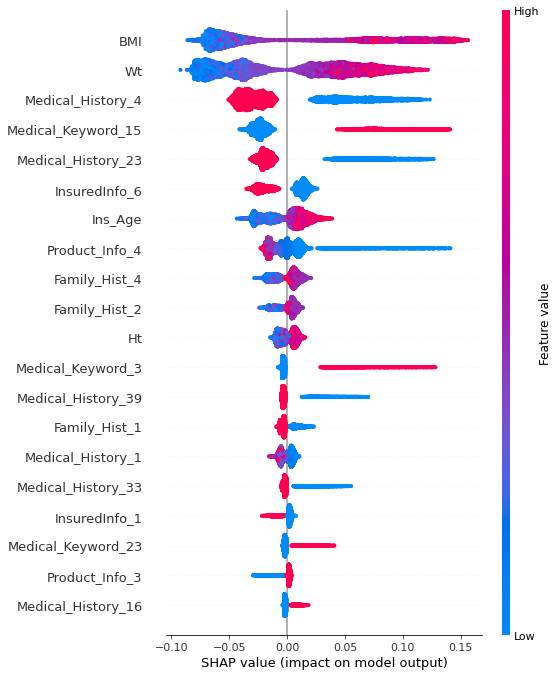

In [94]:
# Obtain a Scatter Summary Plot for RF
shap_values = shap.TreeExplainer(rf_optimal_model).shap_values(x_test)
shap.summary_plot(shap_values[0], x_test)

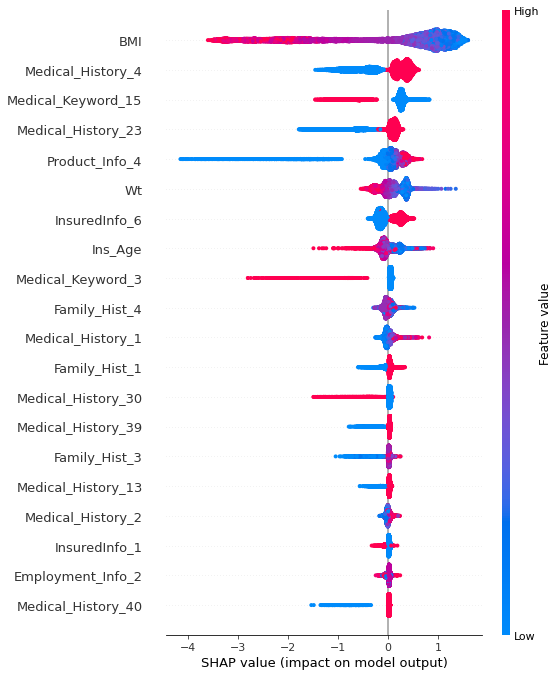

In [95]:
# Obtain a Scatter Summary Plot for GB
shap_values = shap.TreeExplainer(gb_optimal_model).shap_values(x_test)
shap.summary_plot(shap_values, x_test)

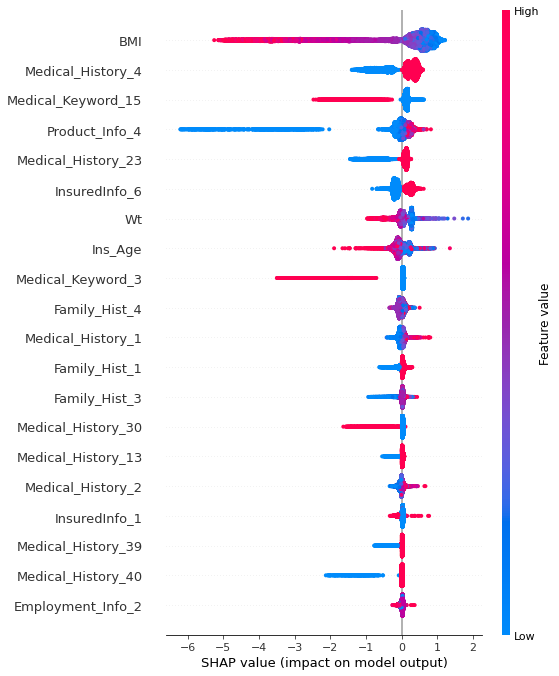

In [96]:
# Obtain a Scatter Summary Plot for XGB
shap_values = shap.TreeExplainer(xgb_optimal_model).shap_values(x_test)
shap.summary_plot(shap_values, x_test)